# Neural Networks: Foundations & Perceptron

This notebook covers:
- Historical context and biological inspiration
- Mathematical foundations of single neurons
- Activation functions and their properties
- Perceptron learning algorithm
- Decision boundaries and the XOR problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from sklearn.datasets import make_blobs, make_classification
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

## 1. Activation Functions Comparison

Visualizing the core activation functions used in neural networks:
- **Step**: Original perceptron activation
- **Sigmoid**: Smooth, outputs probability-like values
- **Tanh**: Zero-centered variant of sigmoid
- **ReLU**: Modern default choice

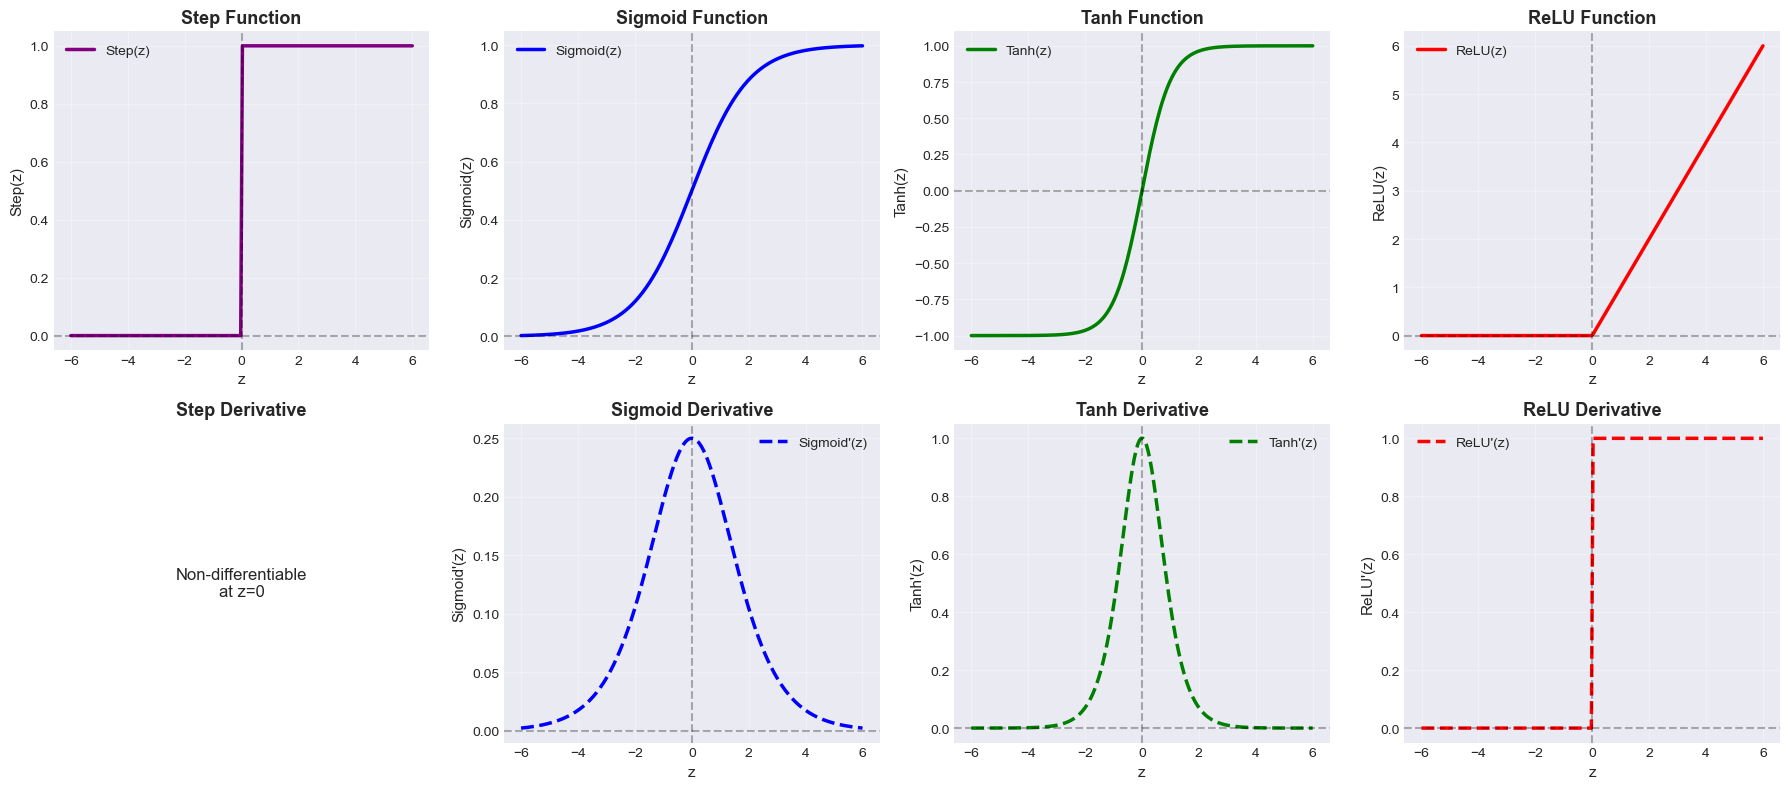

Activation Function Properties:
Step:    Range [0,1], Non-differentiable, Binary output
Sigmoid: Range (0,1), Max derivative = 0.25, Saturates
Tanh:    Range (-1,1), Max derivative = 1, Zero-centered
ReLU:    Range [0,∞), Derivative 0 or 1, No saturation


In [2]:
# Define activation functions
def step(z):
    return (z >= 0).astype(float)

def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z)**2

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

# Visualize activation functions
z = np.linspace(-6, 6, 200)

fig, axes = plt.subplots(2, 4, figsize=(18, 8))

activations = [
    (step, None, 'Step', 'purple'),
    (sigmoid, sigmoid_derivative, 'Sigmoid', 'blue'),
    (tanh, tanh_derivative, 'Tanh', 'green'),
    (relu, relu_derivative, 'ReLU', 'red')
]

for idx, (func, deriv, name, color) in enumerate(activations):
    # Plot function
    axes[0, idx].plot(z, func(z), color=color, linewidth=2.5, label=f'{name}(z)')
    axes[0, idx].axhline(y=0, color='black', linestyle='--', alpha=0.3)
    axes[0, idx].axvline(x=0, color='black', linestyle='--', alpha=0.3)
    axes[0, idx].set_title(f'{name} Function', fontsize=13, fontweight='bold')
    axes[0, idx].set_xlabel('z', fontsize=11)
    axes[0, idx].set_ylabel(f'{name}(z)', fontsize=11)
    axes[0, idx].grid(True, alpha=0.3)
    axes[0, idx].legend(fontsize=10)
    
    # Plot derivative
    if deriv is not None:
        axes[1, idx].plot(z, deriv(z), color=color, linewidth=2.5, 
                         label=f"{name}'(z)", linestyle='--')
        axes[1, idx].axhline(y=0, color='black', linestyle='--', alpha=0.3)
        axes[1, idx].axvline(x=0, color='black', linestyle='--', alpha=0.3)
        axes[1, idx].set_title(f'{name} Derivative', fontsize=13, fontweight='bold')
        axes[1, idx].set_xlabel('z', fontsize=11)
        axes[1, idx].set_ylabel(f"{name}'(z)", fontsize=11)
        axes[1, idx].grid(True, alpha=0.3)
        axes[1, idx].legend(fontsize=10)
    else:
        axes[1, idx].text(0.5, 0.5, 'Non-differentiable\nat z=0', 
                         ha='center', va='center', fontsize=12, 
                         transform=axes[1, idx].transAxes)
        axes[1, idx].set_title(f'{name} Derivative', fontsize=13, fontweight='bold')
        axes[1, idx].axis('off')

plt.tight_layout()
plt.show()

print("Activation Function Properties:")
print("="*60)
print("Step:    Range [0,1], Non-differentiable, Binary output")
print("Sigmoid: Range (0,1), Max derivative = 0.25, Saturates")
print("Tanh:    Range (-1,1), Max derivative = 1, Zero-centered")
print("ReLU:    Range [0,∞), Derivative 0 or 1, No saturation")

## 2. Perceptron Model Implementation

Mathematical model: $y = f(\mathbf{w} \cdot \mathbf{x} + b)$

Where:
- $\mathbf{x}$: Input vector
- $\mathbf{w}$: Weight vector
- $b$: Bias term
- $f$: Activation function

In [3]:
class Perceptron:
    def __init__(self, n_features, learning_rate=0.1):
        """Initialize perceptron with random weights"""
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        self.learning_rate = learning_rate
        self.history = {'weights': [], 'bias': [], 'errors': []}
    
    def activate(self, z):
        """Step activation function"""
        return 1 if z >= 0 else 0
    
    def predict(self, X):
        """Make predictions for input X"""
        z = np.dot(X, self.weights) + self.bias
        if z.ndim == 0:  # Single prediction
            return self.activate(z)
        return np.array([self.activate(zi) for zi in z])
    
    def fit(self, X, y, epochs=100):
        """Train the perceptron using the learning algorithm"""
        n_samples = X.shape[0]
        
        for epoch in range(epochs):
            errors = 0
            
            for xi, yi in zip(X, y):
                # Compute prediction
                prediction = self.predict(xi)
                
                # Calculate error
                error = yi - prediction
                
                # Update weights and bias
                if error != 0:
                    self.weights += self.learning_rate * error * xi
                    self.bias += self.learning_rate * error
                    errors += 1
            
            # Store history
            self.history['weights'].append(self.weights.copy())
            self.history['bias'].append(self.bias)
            self.history['errors'].append(errors)
            
            # Check convergence
            if errors == 0:
                print(f"Converged at epoch {epoch+1}")
                break
        
        return self
    
    def decision_function(self, X):
        """Compute the decision function (before activation)"""
        return np.dot(X, self.weights) + self.bias

print("Perceptron class defined successfully!")

Perceptron class defined successfully!


## 3. Training on Linearly Separable Data

Let's train a perceptron on a simple 2D linearly separable dataset

Converged at epoch 3


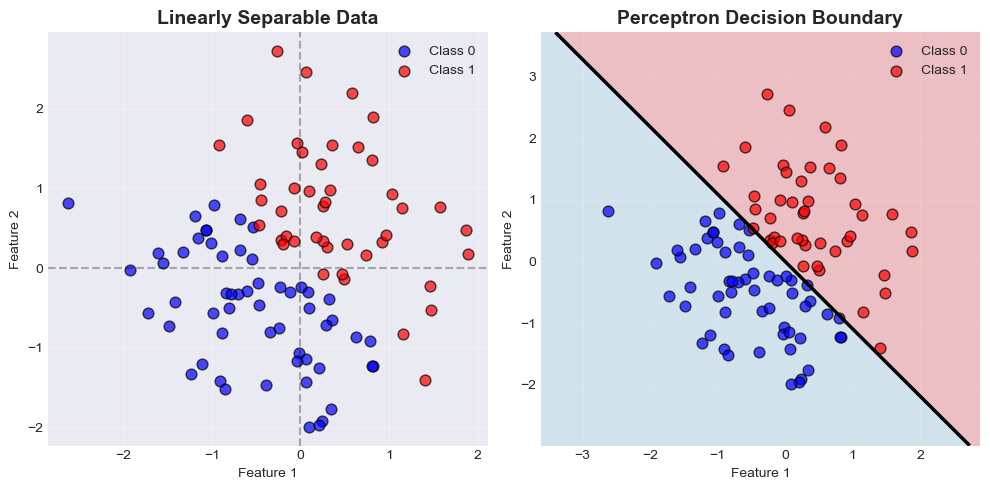


Final weights: [0.32022487 0.29293239]
Final bias: 0.0000
Accuracy: 1.0000


In [4]:
# Generate linearly separable data
np.random.seed(42)
X_train = np.random.randn(100, 2)
y_train = (X_train[:, 0] + X_train[:, 1] > 0).astype(int)

# Visualize the data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], 
           c='blue', label='Class 0', s=60, alpha=0.7, edgecolors='k')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], 
           c='red', label='Class 1', s=60, alpha=0.7, edgecolors='k')
plt.title('Linearly Separable Data', fontsize=14, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)

# Train perceptron
perceptron = Perceptron(n_features=2, learning_rate=0.1)
perceptron.fit(X_train, y_train, epochs=50)

# Plot decision boundary
plt.subplot(1, 2, 2)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = perceptron.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-100, 0, 100], colors=['lightblue', 'lightcoral'], alpha=0.4)
plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2.5)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], 
           c='blue', label='Class 0', s=60, alpha=0.7, edgecolors='k')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], 
           c='red', label='Class 1', s=60, alpha=0.7, edgecolors='k')
plt.title('Perceptron Decision Boundary', fontsize=14, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFinal weights: {perceptron.weights}")
print(f"Final bias: {perceptron.bias:.4f}")
print(f"Accuracy: {np.mean(perceptron.predict(X_train) == y_train):.4f}")

## 4. Learning Process Visualization

Track how the decision boundary evolves during training

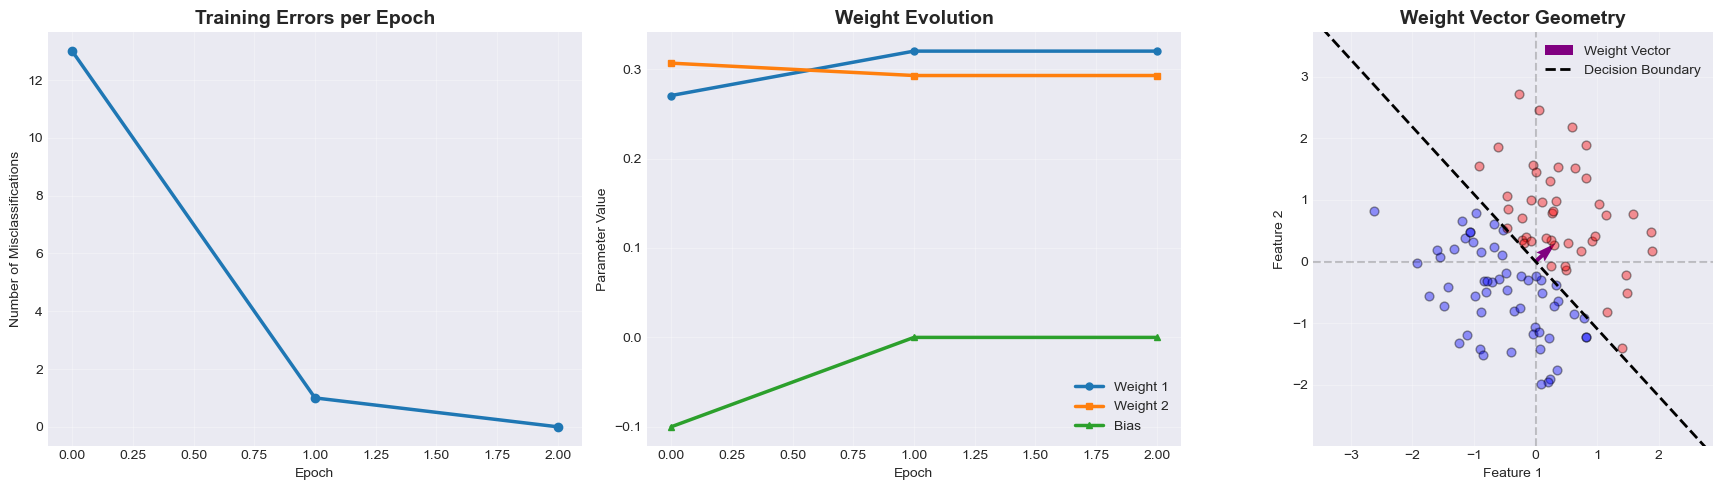

Key Observation:
- Weight vector is perpendicular to the decision boundary
- Errors decrease to zero (convergence for linearly separable data)


In [5]:
# Plot error curve and weight evolution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Error curve
axes[0].plot(perceptron.history['errors'], linewidth=2.5, marker='o', markersize=6)
axes[0].set_title('Training Errors per Epoch', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Number of Misclassifications')
axes[0].grid(True, alpha=0.3)

# Weight evolution
weights_history = np.array(perceptron.history['weights'])
axes[1].plot(weights_history[:, 0], label='Weight 1', linewidth=2.5, marker='o', markersize=5)
axes[1].plot(weights_history[:, 1], label='Weight 2', linewidth=2.5, marker='s', markersize=5)
axes[1].plot(perceptron.history['bias'], label='Bias', linewidth=2.5, marker='^', markersize=5)
axes[1].set_title('Weight Evolution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Parameter Value')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Weight vector in 2D space
axes[2].quiver(0, 0, perceptron.weights[0], perceptron.weights[1], 
              angles='xy', scale_units='xy', scale=1, color='purple', width=0.01, 
              label='Weight Vector')
# Plot decision boundary perpendicular to weight vector
if perceptron.weights[1] != 0:
    x_line = np.array([x_min, x_max])
    y_line = -(perceptron.weights[0] * x_line + perceptron.bias) / perceptron.weights[1]
    axes[2].plot(x_line, y_line, 'k--', linewidth=2, label='Decision Boundary')
axes[2].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], 
               c='blue', alpha=0.4, s=40, edgecolors='k')
axes[2].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], 
               c='red', alpha=0.4, s=40, edgecolors='k')
axes[2].set_title('Weight Vector Geometry', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')
axes[2].set_xlim(x_min, x_max)
axes[2].set_ylim(y_min, y_max)
axes[2].axhline(y=0, color='k', linestyle='--', alpha=0.2)
axes[2].axvline(x=0, color='k', linestyle='--', alpha=0.2)
axes[2].legend()
axes[2].grid(True, alpha=0.3)
axes[2].set_aspect('equal')

plt.tight_layout()
plt.show()

print("Key Observation:")
print("- Weight vector is perpendicular to the decision boundary")
print("- Errors decrease to zero (convergence for linearly separable data)")

## 5. The XOR Problem - Perceptron's Limitation

Demonstrating why a single perceptron cannot solve XOR:

| $x_1$ | $x_2$ | XOR |
|-------|-------|-----|
|   0   |   0   |  0  |
|   0   |   1   |  1  |
|   1   |   0   |  1  |
|   1   |   1   |  0  |

IndexError: invalid index to scalar variable.

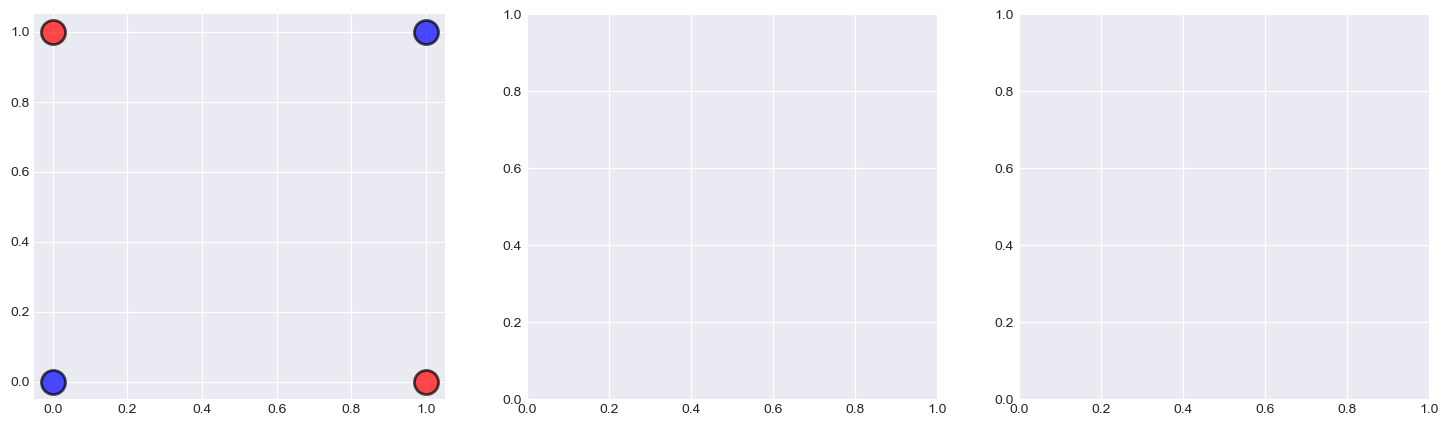

In [ ]:
# XOR dataset
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Try to train perceptron on XOR
perceptron_xor = Perceptron(n_features=2, learning_rate=0.1)
perceptron_xor.fit(X_xor, y_xor, epochs=100)

# Visualize XOR problem
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# XOR data points
axes[0].scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], 
               c='blue', s=300, alpha=0.7, edgecolors='k', linewidth=2, label='Class 0')
axes[0].scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], 
               c='red', s=300, alpha=0.7, edgecolors='k', linewidth=2, label='Class 1')
for i, point in enumerate(X_xor):
    axes[0].annotate(f'({int(point[0])},{int(point[1])})', xy=(point[0], point[1]), 
                    xytext=(10, 10), textcoords='offset points', fontsize=12, fontweight='bold')
axes[0].set_xlim(-0.5, 1.5)
axes[0].set_ylim(-0.5, 1.5)
axes[0].set_xlabel('$x_1$', fontsize=14)
axes[0].set_ylabel('$x_2$', fontsize=14)
axes[0].set_title('XOR Problem (Not Linearly Separable)', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])

# Perceptron's best attempt
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200), np.linspace(-0.5, 1.5, 200))
Z = perceptron_xor.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axes[1].contourf(xx, yy, Z, levels=20, cmap='RdBu', alpha=0.4)
axes[1].contour(xx, yy, Z, levels=[0], colors='black', linewidths=2.5)
axes[1].scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], 
               c='blue', s=300, alpha=0.9, edgecolors='k', linewidth=2, label='Class 0')
axes[1].scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], 
               c='red', s=300, alpha=0.9, edgecolors='k', linewidth=2, label='Class 1')
axes[1].set_xlim(-0.5, 1.5)
axes[1].set_ylim(-0.5, 1.5)
axes[1].set_xlabel('$x_1$', fontsize=14)
axes[1].set_ylabel('$x_2$', fontsize=14)
axes[1].set_title('Perceptron\'s Best Attempt (Fails!)', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])

# Training error
axes[2].plot(perceptron_xor.history['errors'], linewidth=2.5, marker='o', markersize=6, color='red')
axes[2].set_title('Training Errors (Never Converges)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Epoch', fontsize=12)
axes[2].set_ylabel('Number of Misclassifications', fontsize=12)
axes[2].grid(True, alpha=0.3)
axes[2].axhline(y=0, color='green', linestyle='--', linewidth=2, label='Convergence Goal')
axes[2].legend(fontsize=11)

plt.tight_layout()
plt.show()

predictions = perceptron_xor.predict(X_xor)
print("\nXOR Truth Table vs Perceptron Predictions:")
print("="*50)
print(" x1  x2 | True XOR | Perceptron | Correct?")
print("-"*50)
for i in range(4):
    correct = "✓" if predictions[i] == y_xor[i] else "✗"
    print(f"  {int(X_xor[i,0])}   {int(X_xor[i,1])}  |    {y_xor[i]}     |      {predictions[i]}     |   {correct}")
print(f"\nAccuracy: {np.mean(predictions == y_xor):.2%}")
print("\nConclusion: Single perceptron CANNOT solve XOR!")
print("Solution: Multi-layer networks (next notebooks)")

## 6. Comparing Different Learning Rates

Effect of learning rate on convergence speed

In [ ]:
# Test different learning rates
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0]
results = {}

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, lr in enumerate(learning_rates):
    perc = Perceptron(n_features=2, learning_rate=lr)
    perc.fit(X_train, y_train, epochs=50)
    results[lr] = perc
    
    # Plot errors
    axes[idx].plot(perc.history['errors'], linewidth=2.5, marker='o', markersize=5)
    axes[idx].set_title(f'Learning Rate = {lr}', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Epoch')
    axes[idx].set_ylabel('Errors')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].axhline(y=0, color='green', linestyle='--', alpha=0.5, linewidth=2)
    
    # Find convergence epoch
    conv_epoch = next((i for i, e in enumerate(perc.history['errors']) if e == 0), None)
    if conv_epoch is not None:
        axes[idx].text(0.6, 0.9, f'Converged at\nepoch {conv_epoch+1}', 
                      transform=axes[idx].transAxes, fontsize=11,
                      bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Remove extra subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

# Summary
print("\nLearning Rate Comparison:")
print("="*60)
for lr, perc in results.items():
    conv_epoch = next((i for i, e in enumerate(perc.history['errors']) if e == 0), 'No convergence')
    if conv_epoch != 'No convergence':
        conv_epoch += 1
    print(f"LR = {lr:4.2f}: Converged at epoch {conv_epoch}")

## 7. AND, OR Gates (Linearly Separable)

Unlike XOR, these logical gates CAN be solved by a single perceptron

In [ ]:
# Define logic gates
X_logic = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])  # AND gate
y_or = np.array([0, 1, 1, 1])   # OR gate

# Train perceptrons
perc_and = Perceptron(n_features=2, learning_rate=0.1)
perc_and.fit(X_logic, y_and, epochs=20)

perc_or = Perceptron(n_features=2, learning_rate=0.1)
perc_or.fit(X_logic, y_or, epochs=20)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for idx, (gate_name, y_gate, perc) in enumerate([('AND', y_and, perc_and), 
                                                   ('OR', y_or, perc_or)]):
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200), np.linspace(-0.5, 1.5, 200))
    Z = perc.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axes[idx].contourf(xx, yy, Z, levels=20, cmap='RdBu', alpha=0.4)
    axes[idx].contour(xx, yy, Z, levels=[0], colors='black', linewidths=3)
    axes[idx].scatter(X_logic[y_gate==0, 0], X_logic[y_gate==0, 1], 
                     c='blue', s=300, alpha=0.9, edgecolors='k', linewidth=2, label='Output 0')
    axes[idx].scatter(X_logic[y_gate==1, 0], X_logic[y_gate==1, 1], 
                     c='red', s=300, alpha=0.9, edgecolors='k', linewidth=2, label='Output 1')
    
    for i, (x, y) in enumerate(X_logic):
        axes[idx].annotate(f'({int(x[0])},{int(x[1])})\n→{y_gate[i]}', 
                          xy=(x[0], x[1]), xytext=(10, 10), 
                          textcoords='offset points', fontsize=11, fontweight='bold')
    
    axes[idx].set_xlim(-0.5, 1.5)
    axes[idx].set_ylim(-0.5, 1.5)
    axes[idx].set_xlabel('$x_1$', fontsize=14)
    axes[idx].set_ylabel('$x_2$', fontsize=14)
    axes[idx].set_title(f'{gate_name} Gate (Linearly Separable)', 
                       fontsize=14, fontweight='bold')
    axes[idx].legend(fontsize=12)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xticks([0, 1])
    axes[idx].set_yticks([0, 1])

plt.tight_layout()
plt.show()

# Verify predictions
print("\nLogic Gate Predictions:")
print("="*60)
print("\nAND Gate:")
print(" x1  x2 | True | Pred | Correct?")
print("-"*35)
pred_and = perc_and.predict(X_logic)
for i in range(4):
    correct = "✓" if pred_and[i] == y_and[i] else "✗"
    print(f"  {int(X_logic[i,0])}   {int(X_logic[i,1])}  |  {y_and[i]}   |  {pred_and[i]}   |    {correct}")

print("\nOR Gate:")
print(" x1  x2 | True | Pred | Correct?")
print("-"*35)
pred_or = perc_or.predict(X_logic)
for i in range(4):
    correct = "✓" if pred_or[i] == y_or[i] else "✗"
    print(f"  {int(X_logic[i,0])}   {int(X_logic[i,1])}  |  {y_or[i]}   |  {pred_or[i]}   |    {correct}")

print("\n✓ Both AND and OR gates solved perfectly!")

## 8. Key Takeaways

### Mathematical Model
- Perceptron: $y = f(\mathbf{w} \cdot \mathbf{x} + b)$
- Decision boundary: $\mathbf{w} \cdot \mathbf{x} + b = 0$

### Learning Algorithm
- Update rule: $\mathbf{w} \leftarrow \mathbf{w} + \eta(y - \hat{y})\mathbf{x}$
- Converges for linearly separable data

### Activation Functions
- **Step**: Original perceptron, non-differentiable
- **Sigmoid/Tanh**: Smooth, can saturate
- **ReLU**: Modern default, no saturation

### Limitations
- **Cannot solve XOR** (not linearly separable)
- **Solution**: Multi-layer networks

### Success Cases
- **AND, OR gates**: Linearly separable, easily solved
- **Binary classification**: Works for linearly separable data